## Initialisation

In [1]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [2]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [3]:
drug_code = 'gdsc-2-Palbociclib'
folder_name = "gene_expression_drug_response"
exp_id = "Palbo_gdsc2" # experiment id, fgfr4_v1, cdk46_v1
normalised = True
save_figure = False
save_data = True
show_figure = False

In [21]:
# load in ccle static gene expression data
loading_code = f'ccle-{drug_code}-LN_IC50-sin'
feature_data, label_data = data_link.get_data_using_code(loading_code)
print(f'Data loaded for code {loading_code} Feature Shape {feature_data.shape} Label Shape {label_data.shape}')

Data loaded for code ccle-gdsc-2-Palbociclib-LN_IC50-sin Feature Shape (584, 19221) Label Shape (584,)


## Running

### Single Diagram

In [24]:
gene = 'CDK6'

-0.15863358812876963 0.00011824162131654178


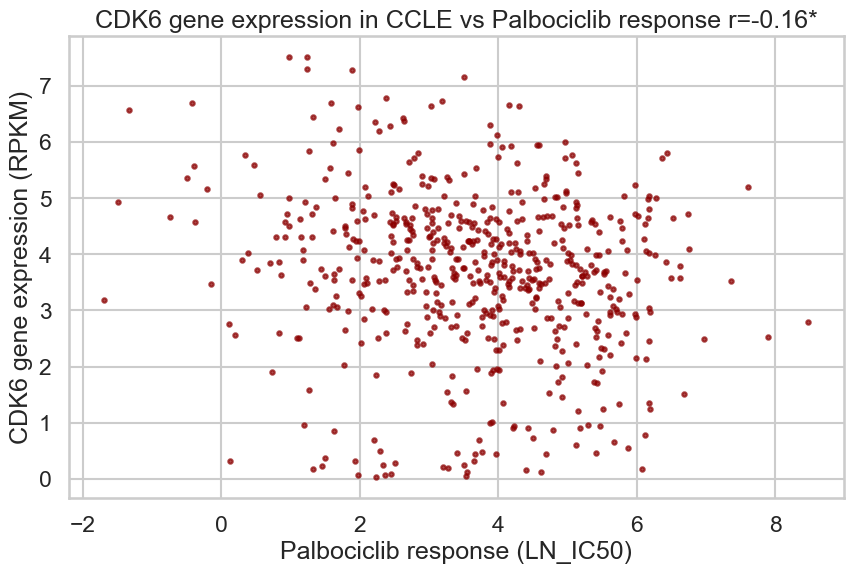

In [25]:
# correlate cdk4 expression with drug response

import DataFunctions as utils 

# import external libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import pearson correlation function
from scipy.stats import pearsonr

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10, 6))
plt.scatter(label_data, feature_data[gene], color='darkred', alpha=0.7, s=10)
# create line of best fit
# m, b = np.polyfit(feature_data[protein_of_interest], label_data, 1)
# plt.plot(feature_data[protein_of_interest], m*feature_data[protein_of_interest] + b, color='darkred')
# show correlation coefficient in the title
corr, p_val = pearsonr(label_data, feature_data[gene])
corr_str = f'{corr:.2f}' if p_val > 0.05 else f'{corr:.2f}*'
print(corr, p_val)
plt.ylabel(f'{gene} gene expression (RPKM)')
plt.xlabel('Palbociclib response (LN_IC50)')
plt.title(f'{gene} gene expression in CCLE vs Palbociclib response r={corr_str}')
plt.show()

### Multiple Genes

In [26]:
gene_list = ['CDK4', 'CDK6']

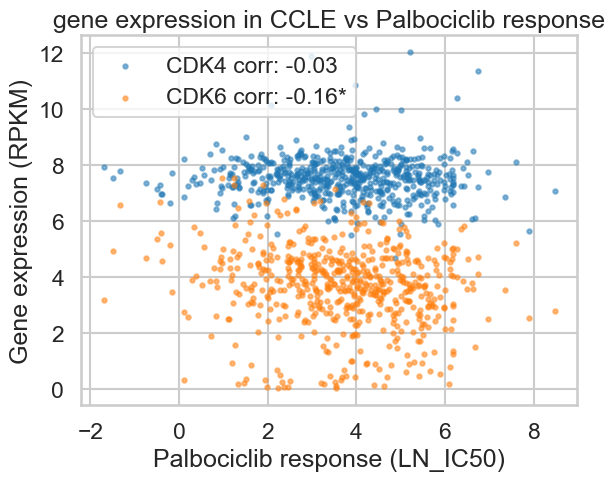

In [29]:
for gene in gene_list:
    gene_expression = feature_data[gene]
    plt.scatter(label_data, gene_expression, alpha=0.5, s=10, label=gene)

gene_list_with_corr = []
for gene in gene_list:
    gene_expression = feature_data[gene]
    corr, p_val = pearsonr(label_data, gene_expression)
    corr_str = f'{corr:.2f}' if p_val > 0.05 else f'{corr:.2f}*'
    gene_corr_string = f'{gene} corr: {corr_str}'
    gene_list_with_corr.append(gene_corr_string)
    
plt.ylabel('Gene expression (RPKM)')
plt.xlabel('Palbociclib response (LN_IC50)')
plt.legend(gene_list_with_corr)
plt.title(f'gene expression in CCLE vs Palbociclib response')
plt.show()